In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('data.csv')
df["device_write"]=df["device_write"].str.replace("mb","").astype('int')
df["memory"]=df["memory"].str.replace("m","").astype('int')
X=df.iloc[:,0:5]
Throughput=df.iloc[:,5:6]
Resp=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Resp, test_size=0.2)


In [13]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

MAPE: 8.744580686083085


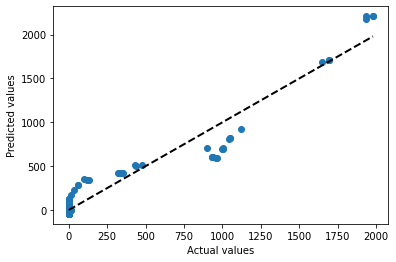

In [15]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

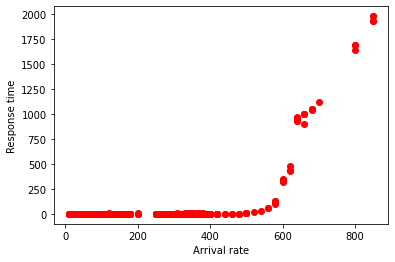

In [16]:
fig, ax = plt.subplots()
ax.scatter(X_test.iloc[:, 0], y_test, color='red')
#ax.plot(X_test.iloc[:, 0], y_pred, color='blue')
ax.set_xlabel('Arrival rate')
ax.set_ylabel('Response time')
plt.show()

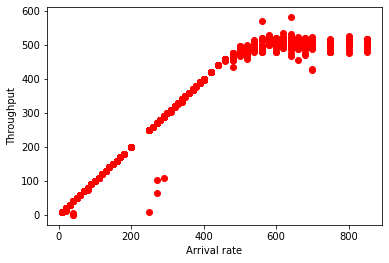

In [19]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:, 0], Throughput, color='red')
#ax.plot(X_test.iloc[:, 0], y_pred, color='blue')
ax.set_xlabel('Arrival rate')
ax.set_ylabel('Throughput')
plt.show()